<a href="https://colab.research.google.com/github/lamiaakhairyibrahim/ITI_training/blob/main/Hierarchical.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementing Hierarchical Clustering with Scikit-Learn
Scikit-Learn provides a straightforward implementation of hierarchical clustering through the AgglomerativeClustering class. Let's walk through the steps to implement hierarchical clustering using Scikit-Learn.

# Step 1: Import Libraries

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Step 2: Generate Sample Data

For demonstration purposes, we will generate synthetic data using the make_blobs function.

In [53]:
# Generate sample data
# n_samples=300, centers=4, cluster_std=0.60, random_state=0
X, y = make_blobs(
                n_samples=300, 
                centers=4, 
                cluster_std=0.60, 
                random_state=42)

# Step 3: Perform Agglomerative Clustering

In [54]:
linkage_methods = ['ward', 'complete', 'average', 'single']
total_y_pred = []

In [55]:
# Perform agglomerative clustering
for link in linkage_methods:
    agg_clustering = AgglomerativeClustering(n_clusters=4, linkage=link)
    
    y_pred = agg_clustering.fit_predict(X)
    
    total_y_pred.append(y_pred)

# Step 4: Plot the Clusters

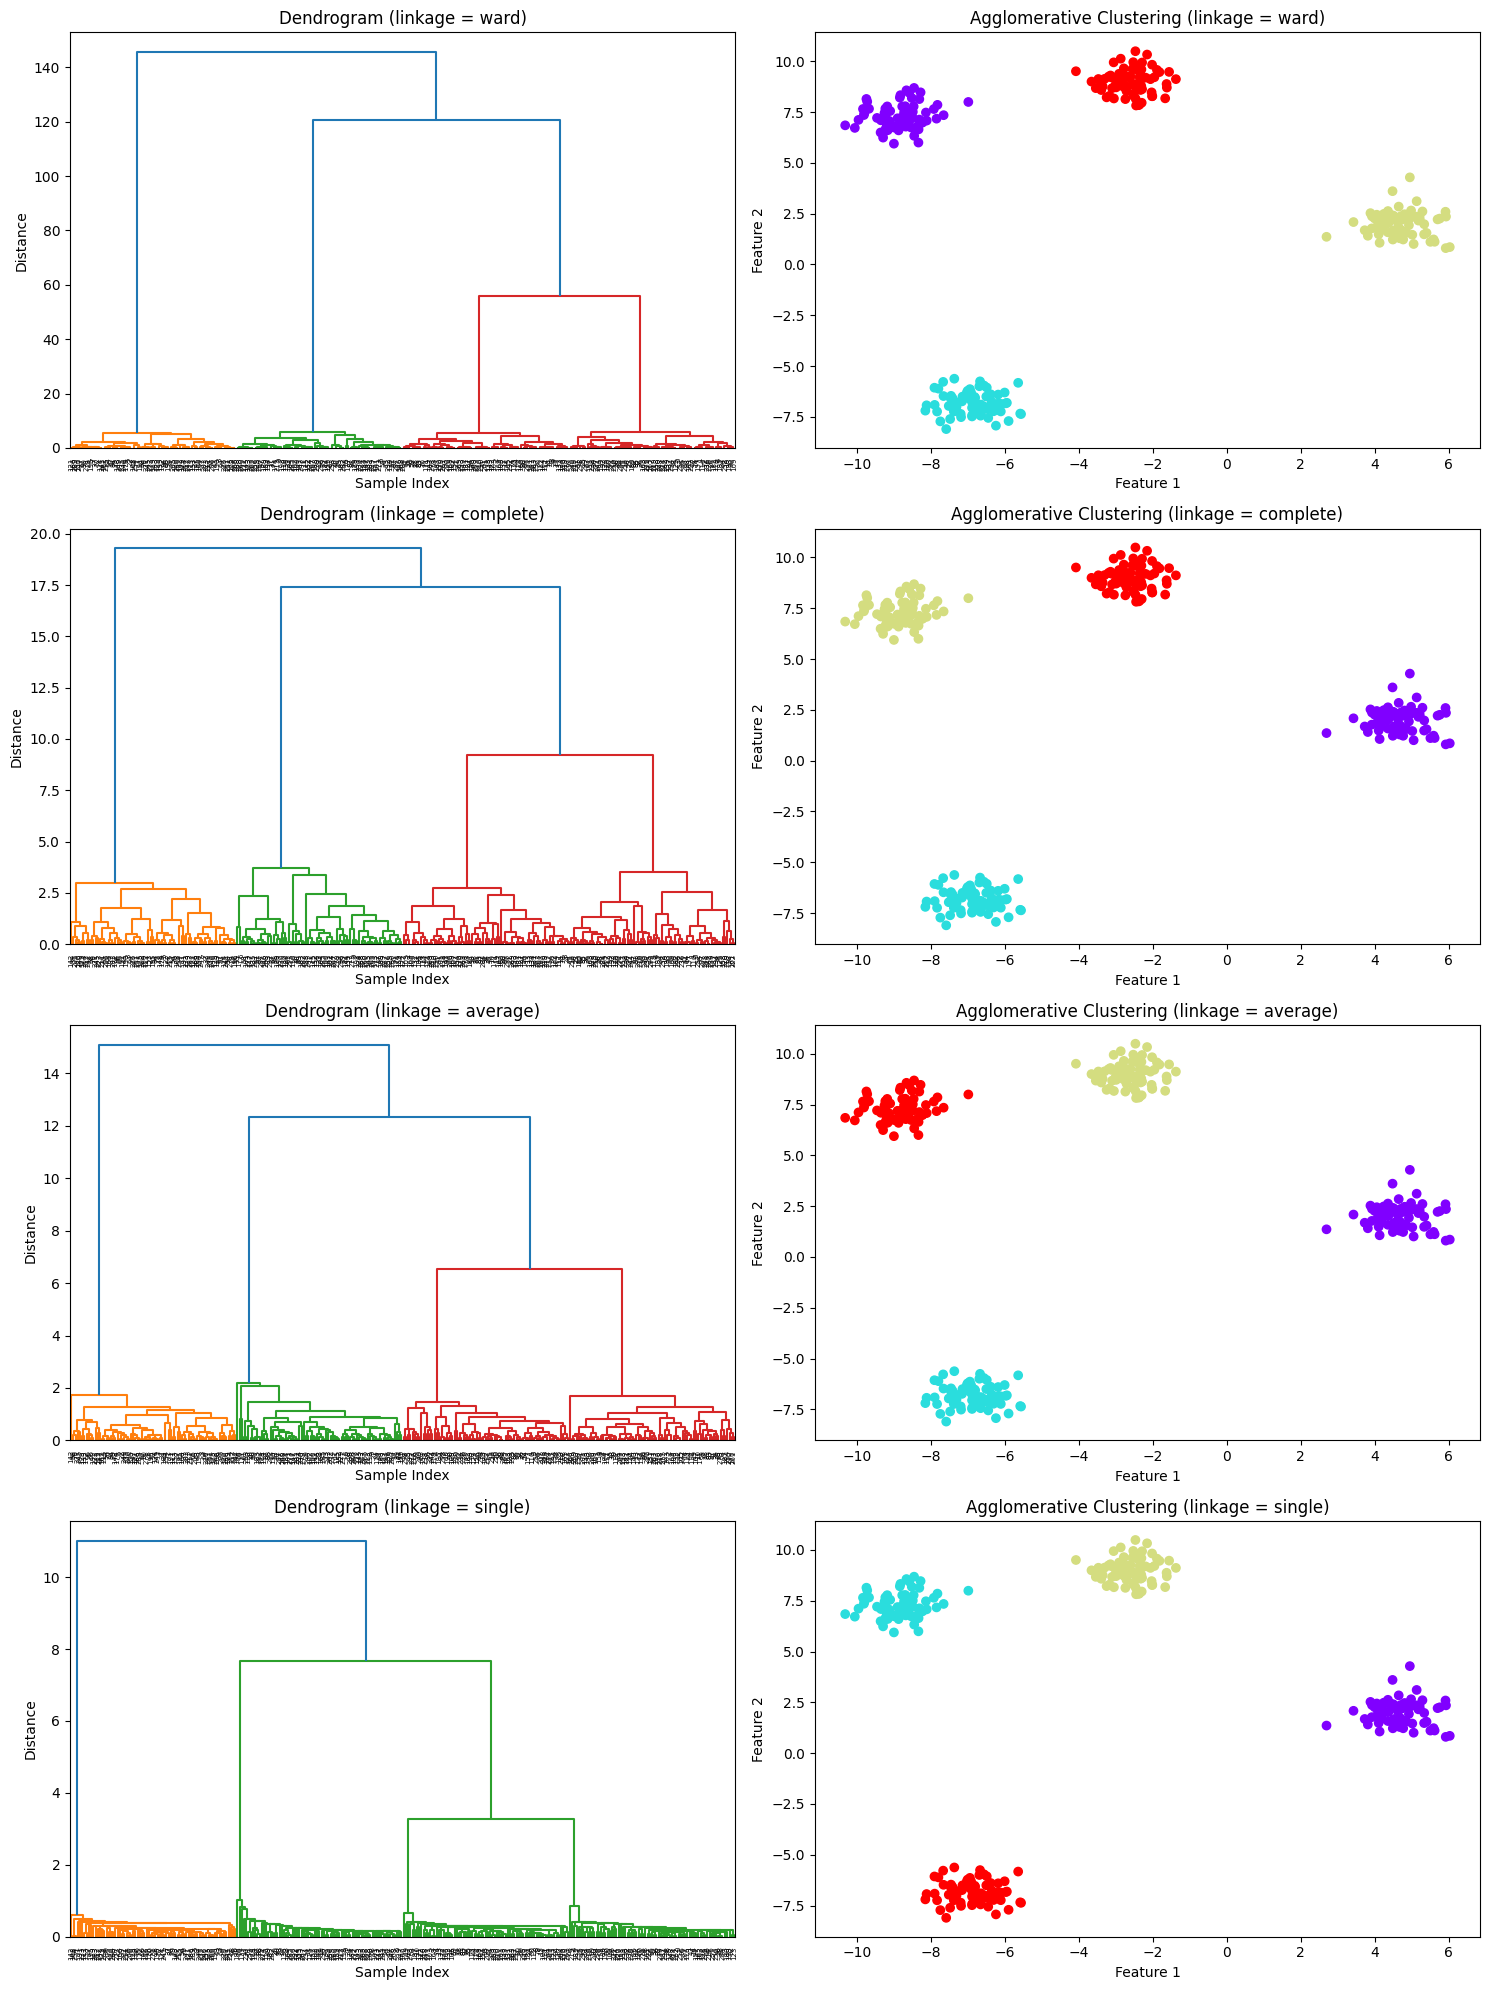

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

titles = [
    f'Agglomerative Clustering (linkage = {method})' for method in linkage_methods
]

fig, axes = plt.subplots(4, 2, figsize=(15, 20))

for i, method in enumerate(linkage_methods):
    
    # 1. dendogram
    ax_dendro = axes[i, 0] # on the left
    
    Z = linkage(X, method=method)

    dendrogram(Z, ax=ax_dendro)
    ax_dendro.set_title(f'Dendrogram (linkage = {method})')
    ax_dendro.set_xlabel('Sample Index')
    ax_dendro.set_ylabel('Distance')


    # 2. scatter plot
    ax_scatter = axes[i, 1] # on the right
    y_pred = total_y_pred[i] 
    
    ax_scatter.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='rainbow')
    ax_scatter.set_title(titles[i])
    ax_scatter.set_xlabel('Feature 1')
    ax_scatter.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
